# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[16, 17, 99, ..., 89, 95, 66],
       [74, 88, 32, ..., 23, 89, 46],
       [82, 24, 89, ..., 19, 21, 94],
       ...,
       [51, 21, 11, ..., 39, 37, 61],
       [ 9, 86, 24, ..., 23, 52, 24],
       [39,  7, 50, ...,  1, 65, 66]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [2]:
k = np.random.default_rng()

k.shuffle(A, axis=1)
A

array([[84, 11, 55, ..., 17, 11, 67],
       [ 1, 87, 28, ..., 88, 60, 48],
       [56, 78, 76, ..., 24, 70, 61],
       ...,
       [19, 63, 17, ..., 21, 99, 61],
       [44, 23, 73, ..., 86, 24, 13],
       [15, 48,  9, ...,  7, 57, 40]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [3]:
A[A[:, ::2].sum(axis=1) > A[:, 1::2].sum(axis=1).mean()]

array([[84, 11, 55, ..., 17, 11, 67],
       [79, 89, 19, ..., 22, 57, 79],
       [ 6,  4, 58, ..., 23,  6,  4],
       ...,
       [37,  8,  4, ...,  6, 35, 77],
       [19, 63, 17, ..., 21, 99, 61],
       [44, 23, 73, ..., 86, 24, 13]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [5]:
np.argmax(A.max(axis=1) - A.min(axis=1))

0

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [6]:
A.argsort(axis=None).argsort().reshape(A.shape) + 1

array([[8397, 1157, 5531, ..., 1805, 1164, 6683],
       [  79, 8703, 2903, ..., 8772, 6025, 4786],
       [5556, 7784, 7572, ..., 2485, 6983, 6120],
       ...,
       [1927, 6321, 1806, ..., 2113, 9913, 6135],
       [4431, 2386, 7332, ..., 8651, 2491, 1348],
       [1534, 4855,  915, ...,  698, 5703, 4069]])

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [7]:
(A - np.vstack(A.min(axis=1))) / np.vstack(A.max(axis=1) - A.min(axis=1))

array([[0.84848485, 0.11111111, 0.55555556, ..., 0.17171717, 0.11111111,
        0.67676768],
       [0.        , 0.90526316, 0.28421053, ..., 0.91578947, 0.62105263,
        0.49473684],
       [0.57142857, 0.79591837, 0.7755102 , ..., 0.24489796, 0.71428571,
        0.62244898],
       ...,
       [0.19191919, 0.63636364, 0.17171717, ..., 0.21212121, 1.        ,
        0.61616162],
       [0.44329897, 0.22680412, 0.74226804, ..., 0.87628866, 0.2371134 ,
        0.12371134],
       [0.16129032, 0.51612903, 0.09677419, ..., 0.07526882, 0.61290323,
        0.43010753]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [8]:
A * np.arange(1, 11).reshape(10, 1, 1)

array([[[ 84,  11,  55, ...,  17,  11,  67],
        [  1,  87,  28, ...,  88,  60,  48],
        [ 56,  78,  76, ...,  24,  70,  61],
        ...,
        [ 19,  63,  17, ...,  21,  99,  61],
        [ 44,  23,  73, ...,  86,  24,  13],
        [ 15,  48,   9, ...,   7,  57,  40]],

       [[168,  22, 110, ...,  34,  22, 134],
        [  2, 174,  56, ..., 176, 120,  96],
        [112, 156, 152, ...,  48, 140, 122],
        ...,
        [ 38, 126,  34, ...,  42, 198, 122],
        [ 88,  46, 146, ..., 172,  48,  26],
        [ 30,  96,  18, ...,  14, 114,  80]],

       [[252,  33, 165, ...,  51,  33, 201],
        [  3, 261,  84, ..., 264, 180, 144],
        [168, 234, 228, ...,  72, 210, 183],
        ...,
        [ 57, 189,  51, ...,  63, 297, 183],
        [132,  69, 219, ..., 258,  72,  39],
        [ 45, 144,  27, ...,  21, 171, 120]],

       ...,

       [[672,  88, 440, ..., 136,  88, 536],
        [  8, 696, 224, ..., 704, 480, 384],
        [448, 624, 608, ..., 192, 560, 488

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [9]:
np.concatenate((A[:, ::2], A[:, 1::2]), axis=1)

array([[84, 55, 81, ...,  8, 17, 67],
       [ 1, 28, 86, ..., 51, 88, 48],
       [56, 76, 71, ..., 61, 24, 61],
       ...,
       [19, 17, 24, ..., 91, 21, 61],
       [44, 73, 24, ...,  7, 86, 13],
       [15,  9,  0, ..., 12,  7, 40]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [10]:
np.count_nonzero(np.all(A > 5, axis=1))

10

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [11]:
np.array(np.split(A, 10)).mean(axis=0)

array([[45.5, 39.9, 51.4, 54.5, 56.4, 48.3, 42.8, 55.4, 45.3, 57.3, 55.1,
        67.2, 61.7, 65.9, 63.5, 59.2, 60.7, 51.2, 66.9, 41.5, 44.3, 43.9,
        56.9, 69.1, 49.6, 53.2, 48.9, 58. , 45.2, 58.8, 62. , 45.5, 50.2,
        57.6, 50.9, 46.4, 75.1, 40.2, 50.5, 41.5, 46.5, 36.6, 61.7, 54.4,
        56.2, 49. , 49.6, 51.1, 48.3, 46.7],
       [38.8, 58.2, 48.8, 42.5, 53.7, 35.8, 49.7, 44.8, 47.7, 40.3, 48.7,
        52.6, 36. , 46.9, 55.9, 45.7, 42.7, 44.9, 59.1, 59.1, 39. , 52.9,
        36.7, 53.9, 61.8, 46.9, 50.6, 38.9, 36.3, 56.9, 60.4, 48.7, 37.4,
        61.5, 49.9, 56. , 42.3, 49.1, 52.5, 49.5, 50.4, 51.7, 48.6, 41.4,
        43.5, 42.9, 56.3, 43.1, 53.2, 40.3],
       [51.5, 46.5, 58.5, 60.7, 54.4, 47.8, 44.5, 44.7, 52.4, 48.5, 45.2,
        52.5, 36.3, 55.6, 50.2, 57.3, 38.4, 41.7, 58.8, 59. , 46.2, 59.7,
        36.6, 42.7, 57.2, 53.4, 46.8, 55.3, 46.4, 44.2, 43. , 54.5, 51.1,
        33.5, 48. , 63.4, 55.3, 42.3, 41.6, 40.6, 57.4, 67.3, 53.7, 49.9,
        67.7, 40.7, 42

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [12]:
u, ind = np.unique(A.flatten(), return_index=True)
u[np.argsort(ind)]

array([84, 11, 55, 82, 81, 91, 19, 99, 25,  2, 93, 80, 89,  0,  7, 58, 72,
       48, 40, 10, 78, 28, 65, 68, 67, 66,  1, 50, 16, 38, 63, 35, 92, 26,
       20, 24, 36, 95, 85, 75,  8, 17, 87, 86, 42, 96, 73, 23, 32, 44, 70,
       83, 27, 29, 88, 46, 43, 12, 74, 54,  6, 41, 51, 60, 56, 76, 71, 22,
       57, 69, 98, 14, 94, 45,  3, 30, 15, 21, 33, 61, 62, 53,  5, 90, 49,
       47, 34, 31, 97, 39, 64, 13, 18, 79,  9,  4, 52, 37, 77, 59])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [13]:
mean = A.mean(axis=0)
np.sqrt(np.sum((A - mean) ** 2, axis=1))

array([229.87950104, 197.15056429, 197.18129982, 209.09730988,
       185.46389136, 206.66319218, 222.48147114, 193.77588859,
       226.04306006, 196.59426492, 195.52579114, 198.96908051,
       209.78411522, 185.09474601, 202.28399591, 210.00922599,
       195.88799095, 205.0218403 , 204.8732657 , 200.51916367,
       185.65698209, 220.40323273, 177.28007502, 195.97529181,
       198.31816609, 204.42601351, 204.42403234, 221.27703225,
       204.48639319, 195.48180222, 219.62644422, 210.327875  ,
       184.15701181, 201.74524778, 202.31706552, 191.21410774,
       207.2085061 , 213.35949709, 190.29252481, 195.17098914,
       207.94808246, 212.83358523, 181.13697855, 227.54422647,
       199.06542894, 202.787364  , 207.57845505, 189.90401523,
       189.98846018, 213.31170854, 214.9490521 , 208.62903681,
       237.2287609 , 211.58075291, 192.45304622, 204.32502294,
       200.99623131, 188.18149484, 198.90152086, 232.32452518,
       188.20742546, 227.31932386, 211.21298492, 214.20

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [14]:
np.where(A < 50, A * 2, A * 3)

array([[252,  22, 165, ...,  34,  22, 201],
       [  2, 261,  56, ..., 264, 180,  96],
       [168, 234, 228, ...,  48, 210, 183],
       ...,
       [ 38, 189,  34, ...,  42, 297, 183],
       [ 88,  46, 219, ..., 258,  48,  26],
       [ 30,  96,  18, ...,  14, 171,  80]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [15]:
def moving_average(arr, window):
    return np.convolve(arr, np.ones(window), "valid") / window

(moving_average(A.flatten(), 3) + 
np.concatenate((moving_average(A.flatten(), 5), np.zeros(2))) + 
np.concatenate((moving_average(A.flatten(), 10), np.zeros(7))))

array([167.5       , 169.13333333, 200.96666667, ...,  31.66666667,
        22.66666667,  34.66666667])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

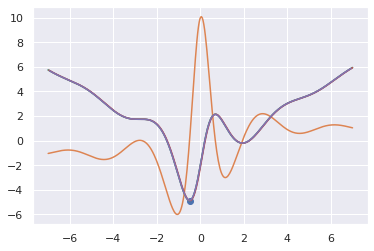

In [16]:
from scipy.misc import derivative
from scipy.optimize import fmin_bfgs

f = lambda x: (5 * np.sin(2 * x) - np.cos(x) ** 2 - 1 + np.abs(x ** 3) - x ** 2) / (x ** 2 + 1)

x = np.linspace(-7, 7, 400)
y = f(x)

plt.plot(x, y)
plt.plot(x, derivative(f, x, dx=1e-6))

min = fmin_bfgs(f, 0, disp=False)
plt.scatter(min, f(min))

plt.plot(x, moving_average(y, 1))
plt.plot(x[1:], moving_average(y, 2))
plt.plot(x[2:-2], moving_average(y, 5))

plt.show()

# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [18]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

            
sample([50, 3, 1, 7, 20], 5)   

[0, 1, 0, 0, 3]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [19]:
import numpy.typing as npt
from scipy.stats import ttest_ind

def np_sample(x: npt.NDArray[np.int64], c: int) -> npt.NDArray[np.int64]:
    assert x.size > 0

    cumsum = np.cumsum(x)
    val = np.random.rand(c) * np.sum(x)
    res = np.argmax(cumsum > val.reshape(c, 1), axis=1)

    return res

np_sample(np.array([50, 3, 1, 7, 20]), 5)


a = sample([50, 3, 1, 7, 20], 5)
b = np_sample(np.array([50, 3, 1, 7, 20]), 5)

ttest_ind(a, b)

Ttest_indResult(statistic=-1.632993161855452, pvalue=0.14111328125000003)

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [20]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

2139

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

7.46 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
93.3 µs ± 1.45 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


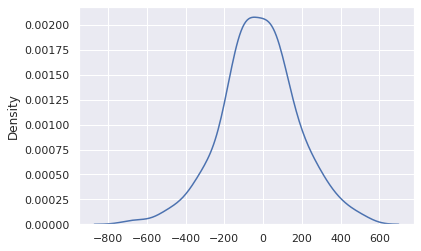

In [21]:
def np_walk(n: int):
    return np.random.randint(-3, 4, n).sum()

np_walk(10_000)
%timeit walk(10_000)
%timeit np_walk(10_000)

n = 300

res_np_walk = np.zeros(n)

for i in range(n):
    res_np_walk[i] = np_walk(10_000)

sns.kdeplot(data=res_np_walk)

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [23]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


0.36200805441364947

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [24]:
import numba

strange_conv_numba = numba.jit(strange_conv)
strange_conv_numba(a)

0.36200805441364947

In [45]:
!pip install taichi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.6/32.6 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 5.0 MB/s eta 0:00:00


In [46]:
import taichi as ti

ti.init(arch=ti.cpu)

@ti.kernel
def strange_conv_taichi(a: ti.types.ndarray()) -> ti.f64:
    _x = a.shape[0]
    _y = a.shape[1]

    t = 1.
    for y in range(_y - 5):
        for x in range(_x - 4 * (y + 1) + 1):
            c = 1.5 * a[y + 1, x + 2] - a[y + 5, x + 3] * a[y, x] + 0.2 * a[y + 4, x]
            t = 0.2 * t + 0.8 * c

    return t

strange_conv_taichi(a)

[Taichi] version 1.4.0, llvm 15.0.4, commit fbe92fd8, linux, python 3.8.16
[Taichi] Starting on arch=x64


0.36200806498527527